<a href="https://colab.research.google.com/github/ap15032005/final-project-tc-vc/blob/main/viscosity_models_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()


Saving viscosity_final dataset.xlsm to viscosity_final dataset.xlsm


In [2]:
import os
os.listdir()


['.config', 'viscosity_final dataset.xlsm', 'sample_data']

In [3]:
import pandas as pd

vis_data = pd.read_excel("viscosity_final dataset.xlsm")
vis_data.head()


,Y_viscosity,X1_Temperature_C,X2_Concentration,X3_BaseFluid_viscosity
0,0.01690,25,0.0,0.0169
1,0.01792,25,0.5,0.0169
2,0.01904,25,1.0,0.0169
3,0.02056,25,1.5,0.0169
4,0.02279,25,2.0,0.0169


GAUSSIAN PROCESS REGRESSION (GPR)

In [4]:
import numpy as np
import pandas as pd

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [5]:
X = vis_data[['X1_Temperature_C',
              'X2_Concentration',
              'X3_BaseFluid_viscosity']]

y = vis_data['Y_viscosity'].values.reshape(-1, 1)


In [6]:
# STEP 3: Initialize scalers
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# STEP 3: Scale input and output data
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y).ravel()


In [7]:
from sklearn.model_selection import train_test_split

# 80–20 split
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# 70–30 split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=42
)

# 60–40 split
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(
    X_scaled, y_scaled, test_size=0.4, random_state=42
)


In [8]:
# STEP 5: Define kernel (Constant × RBF + Noise)
kernel = C(1.0, (1e-3, 1e3)) * \
         RBF(length_scale=[1.0, 1.0, 1.0],
             length_scale_bounds=(1e-2, 1e2)) + \
         WhiteKernel(noise_level=1e-6)


In [10]:
# STEP 6: Initialize Gaussian Process Regressor
gpr = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=10,
    random_state=42
)

# STEP 6: Train the model
# -------- 80–20 --------
gpr_80 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr_80.fit(X_train_80, y_train_80)

# -------- 70–30 --------
gpr_70 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr_70.fit(X_train_70, y_train_70)

# -------- 60–40 --------
gpr_60 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr_60.fit(X_train_60, y_train_60)



/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/_gpr.

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1]) + WhiteKernel(noise_level=1e-06),
                         n_restarts_optimizer=10, random_state=42)

In [11]:
# -------- 80–20 --------
y_train_pred_80_s = gpr_80.predict(X_train_80)
y_test_pred_20_s  = gpr_80.predict(X_test_20)

y_train_pred_80 = y_scaler.inverse_transform(
    y_train_pred_80_s.reshape(-1, 1)
).ravel()

y_test_pred_20 = y_scaler.inverse_transform(
    y_test_pred_20_s.reshape(-1, 1)
).ravel()

y_train_true_80 = y_scaler.inverse_transform(
    y_train_80.reshape(-1, 1)
).ravel()

y_test_true_20 = y_scaler.inverse_transform(
    y_test_20.reshape(-1, 1)
).ravel()

# -------- 70–30 --------
y_train_pred_70_s = gpr_70.predict(X_train_70)
y_test_pred_30_s  = gpr_70.predict(X_test_30)

y_train_pred_70 = y_scaler.inverse_transform(
    y_train_pred_70_s.reshape(-1, 1)
).ravel()

y_test_pred_30 = y_scaler.inverse_transform(
    y_test_pred_30_s.reshape(-1, 1)
).ravel()

y_train_true_70 = y_scaler.inverse_transform(
    y_train_70.reshape(-1, 1)
).ravel()

y_test_true_30 = y_scaler.inverse_transform(
    y_test_30.reshape(-1, 1)
).ravel()

# -------- 60–40 --------
y_train_pred_60_s = gpr_60.predict(X_train_60)
y_test_pred_40_s  = gpr_60.predict(X_test_40)

y_train_pred_60 = y_scaler.inverse_transform(
    y_train_pred_60_s.reshape(-1, 1)
).ravel()

y_test_pred_40 = y_scaler.inverse_transform(
    y_test_pred_40_s.reshape(-1, 1)
).ravel()

y_train_true_60 = y_scaler.inverse_transform(
    y_train_60.reshape(-1, 1)
).ravel()

y_test_true_40 = y_scaler.inverse_transform(
    y_test_40.reshape(-1, 1)
).ravel()


In [12]:
# STEP 8: Define evaluation function
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


In [13]:
print("========== GPR RESULTS (3 FEATURES) ==========")

# -------- 80–20 --------
print("\n80–20 SPLIT")
print("TRAINING RESULTS")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_true_80, y_train_pred_80))

print("TESTING RESULTS")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_20, y_test_pred_20))


# -------- 70–30 --------
print("\n70–30 SPLIT")
print("TRAINING RESULTS")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_true_70, y_train_pred_70))

print("TESTING RESULTS")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_30, y_test_pred_30))


# -------- 60–40 --------
print("\n60–40 SPLIT")
print("TRAINING RESULTS")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_true_60, y_train_pred_60))

print("TESTING RESULTS")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_40, y_test_pred_40))


========== GPR RESULTS (3 FEATURES) ==========

80–20 SPLIT
TRAINING RESULTS
MSE, RMSE, MAE, R2 = (3.3102800718380573e-09, np.float64(5.7535033430407054e-05), 1.313617089080111e-05, 0.9999222835190547)
TESTING RESULTS
MSE, RMSE, MAE, R2 = (6.18448399068529e-11, np.float64(7.864149026236272e-06), 6.3930594344006685e-06, 0.9999987368235108)

70–30 SPLIT
TRAINING RESULTS
MSE, RMSE, MAE, R2 = (3.748869538766543e-09, np.float64(6.122801269653086e-05), 1.4656367875491034e-05, 0.9999133555305982)
TESTING RESULTS
MSE, RMSE, MAE, R2 = (8.357636772756796e-11, np.float64(9.142011142389183e-06), 7.094740287782415e-06, 0.9999981534717287)

60–40 SPLIT
TRAINING RESULTS
MSE, RMSE, MAE, R2 = (3.5608890947350573e-09, np.float64(5.967318572638013e-05), 1.3665587963139282e-05, 0.9999172270452396)
TESTING RESULTS
MSE, RMSE, MAE, R2 = (1.7571474101718217e-09, np.float64(4.1918342168695336e-05), 9.527167958711548e-06, 0.999960381379472)


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

def plot_mse_vs_iteration(kernel, X_train, y_train, X_test, y_test, y_scaler, title):

    train_fractions = np.linspace(0.1, 1.0, 10)
    mse_values = []

    # ---- Compute final R2 using full training data ----
    gpr_full = GaussianProcessRegressor(
        kernel=kernel,
        n_restarts_optimizer=10,
        random_state=42
    )
    gpr_full.fit(X_train, y_train)

    y_test_pred_full_s = gpr_full.predict(X_test)
    y_test_pred_full = y_scaler.inverse_transform(
        y_test_pred_full_s.reshape(-1, 1)
    ).ravel()
    y_test_true = y_scaler.inverse_transform(
        y_test.reshape(-1, 1)
    ).ravel()

    r2 = r2_score(y_test_true, y_test_pred_full)

    # ---- Learning curve ----
    for frac in train_fractions:
        size = max(1, int(len(X_train) * frac))

        gpr_tmp = GaussianProcessRegressor(
            kernel=kernel,
            n_restarts_optimizer=10,
            random_state=42
        )
        gpr_tmp.fit(X_train[:size], y_train[:size])

        y_pred_s = gpr_tmp.predict(X_test)
        y_pred = y_scaler.inverse_transform(
            y_pred_s.reshape(-1, 1)
        ).ravel()

        mse_values.append(mean_squared_error(y_test_true, y_pred))

    plt.figure()
    plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o')
    plt.xlabel("Iteration (Increasing Training Size)")
    plt.ylabel("MSE")
    plt.title(f"{title}\nR² = {r2:.4f}")
    plt.grid(True)
    plt.show()

def plot_actual_vs_predicted(y_true, y_pred, title):

    r2 = r2_score(y_true, y_pred)

    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.7, label=f"R² = {r2:.4f}")
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()], 'r--', label="Ideal Fit")

    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWar

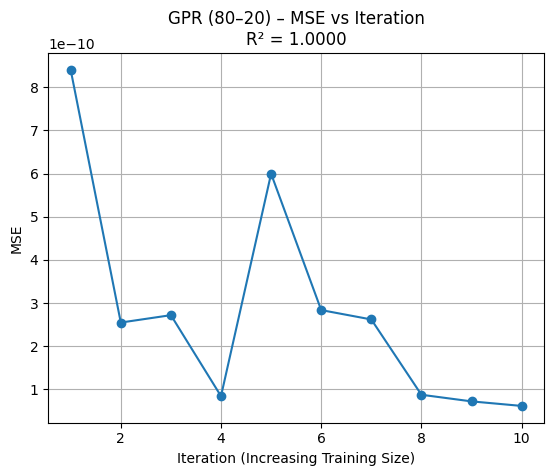

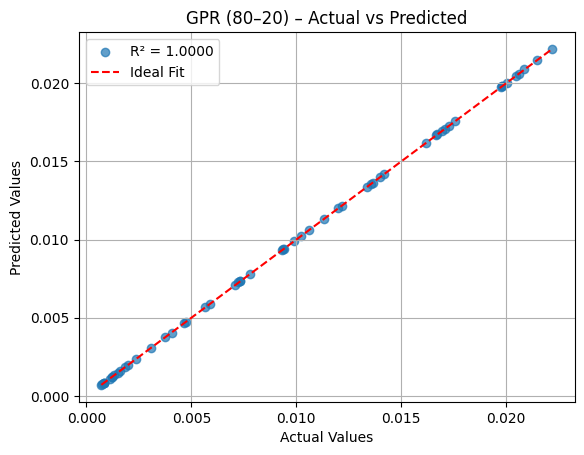

In [18]:
plot_mse_vs_iteration(
    kernel,
    X_train_80, y_train_80,
    X_test_20, y_test_20,
    y_scaler,
    "GPR (80–20) – MSE vs Iteration"
)

plot_actual_vs_predicted(
    y_test_true_20,
    y_test_pred_20,
    "GPR (80–20) – Actual vs Predicted"
)


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/

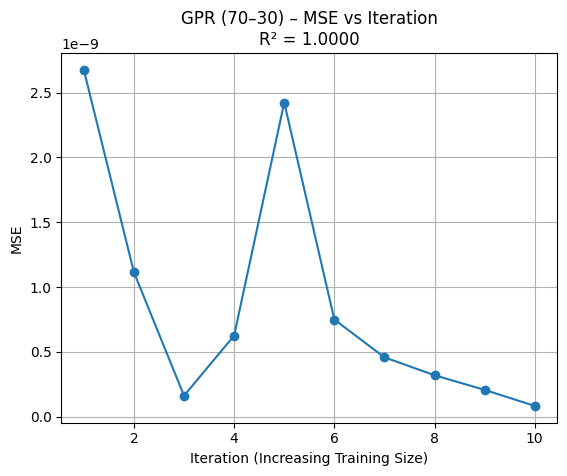

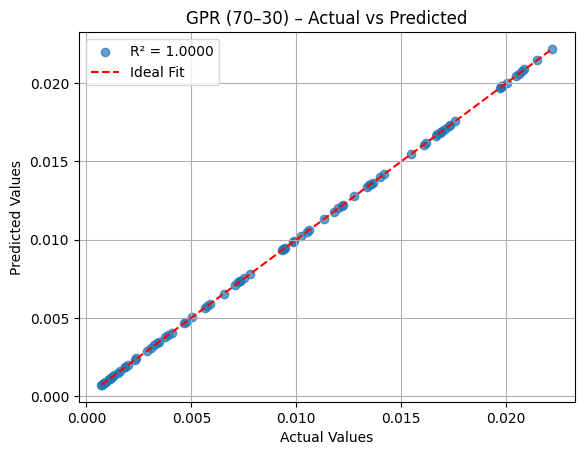

In [19]:
plot_mse_vs_iteration(
    kernel,
    X_train_70, y_train_70,
    X_test_30, y_test_30,
    y_scaler,
    "GPR (70–30) – MSE vs Iteration"
)

plot_actual_vs_predicted(
    y_test_true_30,
    y_test_pred_30,
    "GPR (70–30) – Actual vs Predicted"
)


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/_gpr.

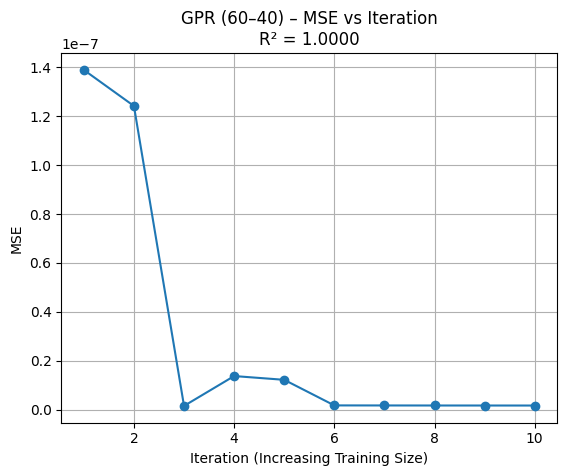

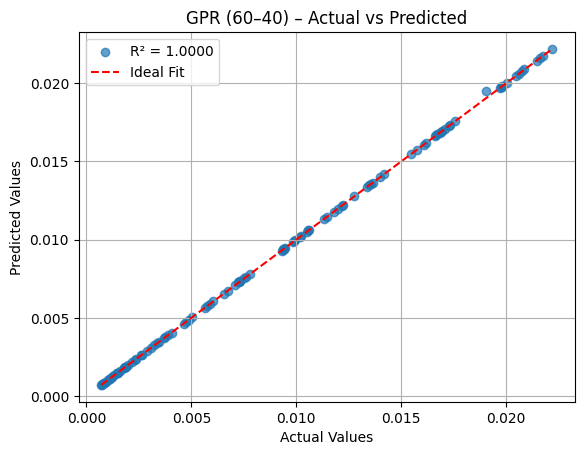

In [20]:
plot_mse_vs_iteration(
    kernel,
    X_train_60, y_train_60,
    X_test_40, y_test_40,
    y_scaler,
    "GPR (60–40) – MSE vs Iteration"
)

plot_actual_vs_predicted(
    y_test_true_40,
    y_test_pred_40,
    "GPR (60–40) – Actual vs Predicted"
)


MLR FOR VISCOSITY (VC)

In [21]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import ML utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# STEP 2: Define a reusable evaluation function
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)   # Mean Squared Error
    rmse = np.sqrt(mse)                        # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)              # Coefficient of Determination
    return mse, rmse, mae, r2


In [22]:
# STEP 3B: Select input features for viscosity prediction
X_vc = vis_data[['X1_Temperature_C',
                 'X2_Concentration',
                 'X3_BaseFluid_viscosity']]

# STEP 3B: Select target variable (Viscosity)
y_vc = vis_data['Y_viscosity']


In [23]:
# STEP 4B: Initialize scaler
scaler_vc = MinMaxScaler()

# STEP 4B: Scale viscosity input features
X_vc_scaled = scaler_vc.fit_transform(X_vc)


In [24]:
# STEP 5B: Split viscosity data into training and testing sets

X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=42
)

X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(
    X_scaled, y_scaled, test_size=0.4, random_state=42
)



In [25]:
# STEP 6B: Initialize MLR model for viscosity
mlr_vc = LinearRegression()

# STEP 6B: Fit model on viscosity training data
mlr_80 = LinearRegression()
mlr_80.fit(X_train_80, y_train_80)

mlr_70 = LinearRegression()
mlr_70.fit(X_train_70, y_train_70)

mlr_60 = LinearRegression()
mlr_60.fit(X_train_60, y_train_60)



LinearRegression()

In [26]:
y_test_pred_20 = y_scaler.inverse_transform(
    mlr_80.predict(X_test_20).reshape(-1,1)
).ravel()

y_test_true_20 = y_scaler.inverse_transform(
    y_test_20.reshape(-1,1)
).ravel()

y_test_pred_30 = y_scaler.inverse_transform(
    mlr_70.predict(X_test_30).reshape(-1,1)
).ravel()

y_test_true_30 = y_scaler.inverse_transform(
    y_test_30.reshape(-1,1)
).ravel()

y_test_pred_40 = y_scaler.inverse_transform(
    mlr_60.predict(X_test_40).reshape(-1,1)
).ravel()

y_test_true_40 = y_scaler.inverse_transform(
    y_test_40.reshape(-1,1)
).ravel()


In [27]:
# STEP 8B: Display training performance
print("========== MLR RESULTS (3 FEATURES) ==========")

print("\n80–20 SPLIT (TEST)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_20, y_test_pred_20))

print("\n70–30 SPLIT (TEST)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_30, y_test_pred_30))

print("\n60–40 SPLIT (TEST)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_40, y_test_pred_40))


========== MLR RESULTS (3 FEATURES) ==========

80–20 SPLIT (TEST)
MSE, RMSE, MAE, R2 = (9.788300497796236e-08, np.float64(0.00031286259760150676), 0.00023893944393286857, 0.9980007465333085)

70–30 SPLIT (TEST)
MSE, RMSE, MAE, R2 = (1.0093366983601622e-07, np.float64(0.0003177005977898314), 0.00023736955013008807, 0.9977699811567897)

60–40 SPLIT (TEST)
MSE, RMSE, MAE, R2 = (9.814219804411837e-08, np.float64(0.0003132765520177314), 0.00023205299518114542, 0.9977871756919247)


In [30]:
for name, model in [
    ("80–20", mlr_80),
    ("70–30", mlr_70),
    ("60–40", mlr_60)
]:
    a, b, d = model.coef_
    c = model.intercept_

    print(f"\nFinal MLR Equation (Viscosity) – {name} Split:")
    print(f"μ = {a:.6f}*T + {b:.6f}*φ + {d:.6f}*BF + {c:.6f}")



Final MLR Equation (Viscosity) – 80–20 Split:
μ = 0.023400*T + 0.058575*φ + 0.911282*BF + -0.044772

Final MLR Equation (Viscosity) – 70–30 Split:
μ = 0.028383*T + 0.060017*φ + 0.915597*BF + -0.047965

Final MLR Equation (Viscosity) – 60–40 Split:
μ = 0.024882*T + 0.063605*φ + 0.912796*BF + -0.047638


In [31]:
def plot_actual_vs_predicted(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)

    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.7, label=f"R² = {r2:.4f}")
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()], 'r--', label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


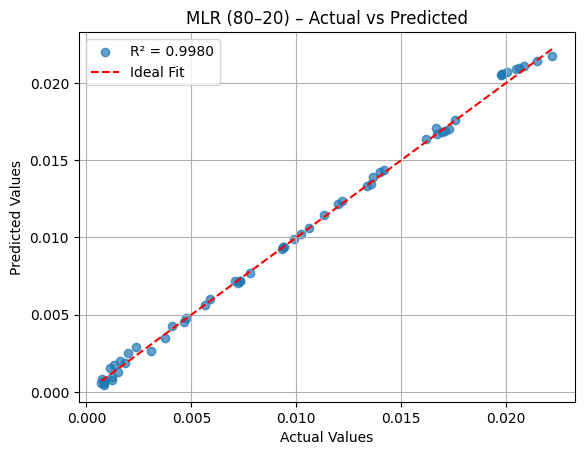

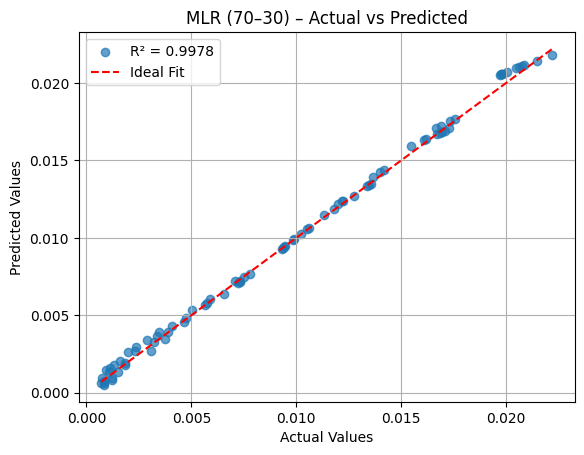

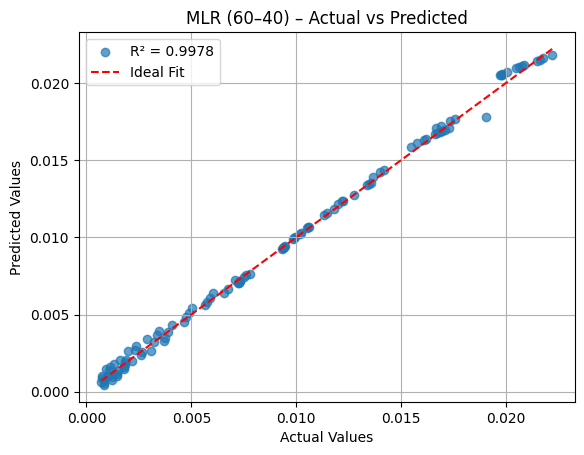

In [29]:
plot_actual_vs_predicted(
    y_test_true_20,
    y_test_pred_20,
    "MLR (80–20) – Actual vs Predicted"
)

plot_actual_vs_predicted(
    y_test_true_30,
    y_test_pred_30,
    "MLR (70–30) – Actual vs Predicted"
)

plot_actual_vs_predicted(
    y_test_true_40,
    y_test_pred_40,
    "MLR (60–40) – Actual vs Predicted"
)


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def plot_mse_vs_training_size_mlr(X_train, y_train, X_test, y_test, y_scaler, title):

    train_fractions = np.linspace(0.1, 1.0, 10)
    mse_values = []

    # Convert test target back to original scale once
    y_test_true = y_scaler.inverse_transform(
        y_test.reshape(-1, 1)
    ).ravel()

    for frac in train_fractions:
        size = max(2, int(len(X_train) * frac))

        model = LinearRegression()
        model.fit(X_train[:size], y_train[:size])

        y_test_pred_scaled = model.predict(X_test)
        y_test_pred = y_scaler.inverse_transform(
            y_test_pred_scaled.reshape(-1, 1)
        ).ravel()

        mse_values.append(mean_squared_error(y_test_true, y_test_pred))

    plt.figure()
    plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o')
    plt.xlabel("Training Size (Increasing Samples)")
    plt.ylabel("MSE")
    plt.title(title)
    plt.grid(True)
    plt.show()


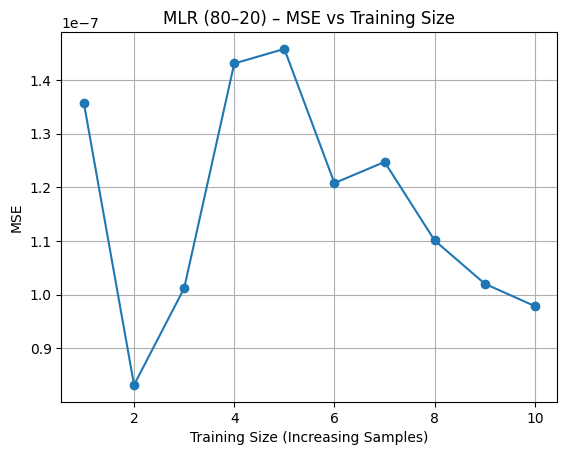

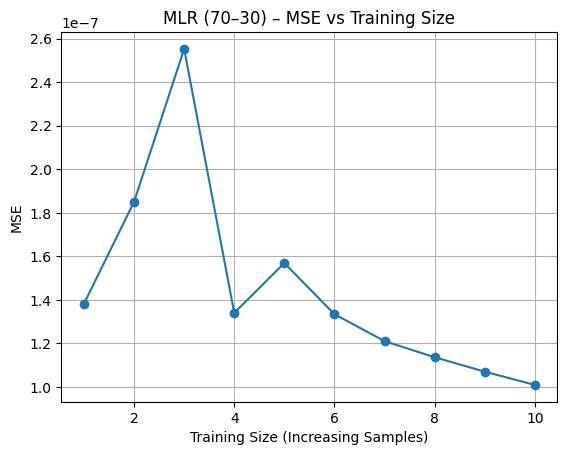

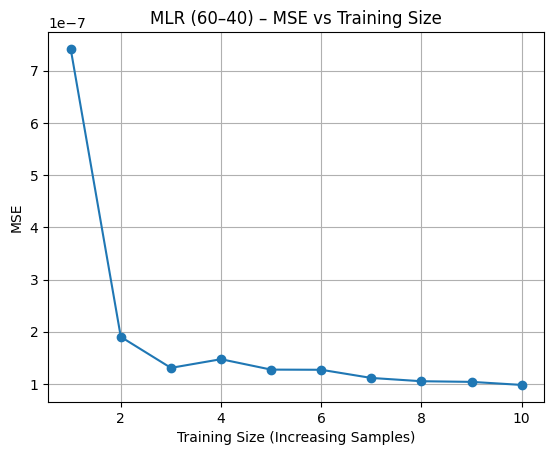

In [33]:
plot_mse_vs_training_size_mlr(
    X_train_80, y_train_80,
    X_test_20, y_test_20,
    y_scaler,
    "MLR (80–20) – MSE vs Training Size"
)

plot_mse_vs_training_size_mlr(
    X_train_70, y_train_70,
    X_test_30, y_test_30,
    y_scaler,
    "MLR (70–30) – MSE vs Training Size"
)

plot_mse_vs_training_size_mlr(
    X_train_60, y_train_60,
    X_test_40, y_test_40,
    y_scaler,
    "MLR (60–40) – MSE vs Training Size"
)


Random Forest R

In [34]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import Random Forest and utilities
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# STEP 2: Define evaluation metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)     # Mean Squared Error
    rmse = np.sqrt(mse)                          # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)    # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)                # R-squared
    return mse, rmse, mae, r2


In [35]:
# STEP 3B: Select input features
X_vc = vis_data[['X1_Temperature_C',
                 'X2_Concentration',
                 'X3_BaseFluid_viscosity']]

# STEP 3B: Select target variable
y_vc = vis_data['Y_viscosity']


In [36]:

rf_80 = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf_80.fit(X_train_80, y_train_80)

rf_70 = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf_70.fit(X_train_70, y_train_70)

rf_60 = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf_60.fit(X_train_60, y_train_60)


RandomForestRegressor(n_estimators=300, random_state=42)

In [37]:
y_test_pred_20_rf = y_scaler.inverse_transform(
    rf_80.predict(X_test_20).reshape(-1,1)
).ravel()

y_test_true_20 = y_scaler.inverse_transform(
    y_test_20.reshape(-1,1)
).ravel()

y_test_pred_30_rf = y_scaler.inverse_transform(
    rf_70.predict(X_test_30).reshape(-1,1)
).ravel()

y_test_true_30 = y_scaler.inverse_transform(
    y_test_30.reshape(-1,1)
).ravel()

y_test_pred_40_rf = y_scaler.inverse_transform(
    rf_60.predict(X_test_40).reshape(-1,1)
).ravel()

y_test_true_40 = y_scaler.inverse_transform(
    y_test_40.reshape(-1,1)
).ravel()


In [38]:
print("========== RANDOM FOREST RESULTS (3 FEATURES) ==========")

print("\n80–20 SPLIT (TEST)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_20, y_test_pred_20_rf))

print("\n70–30 SPLIT (TEST)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_30, y_test_pred_30_rf))

print("\n60–40 SPLIT (TEST)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_40, y_test_pred_40_rf))


========== RANDOM FOREST RESULTS (3 FEATURES) ==========

80–20 SPLIT (TEST)
MSE, RMSE, MAE, R2 = (1.0350062283369266e-08, np.float64(0.00010173525585247853), 6.682069704582509e-05, 0.9997886007085177)

70–30 SPLIT (TEST)
MSE, RMSE, MAE, R2 = (2.051403117259155e-08, np.float64(0.0001432272012314405), 9.953809343731403e-05, 0.9995467649582206)

60–40 SPLIT (TEST)
MSE, RMSE, MAE, R2 = (2.4107760899651858e-08, np.float64(0.00015526674112523859), 0.00010669940120380704, 0.9994564393258439)


In [39]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)

    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.7, label=f"R² = {r2:.4f}")
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()], 'r--', label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


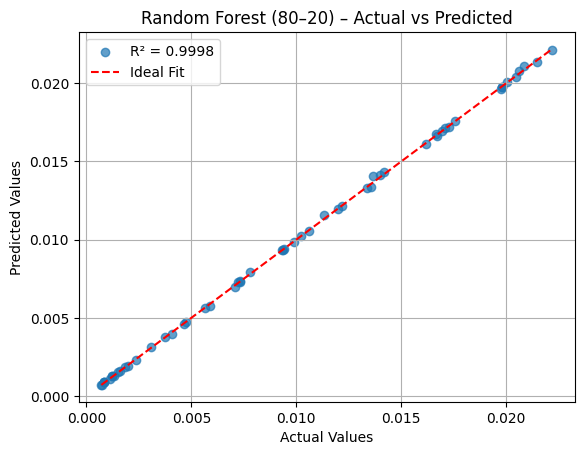

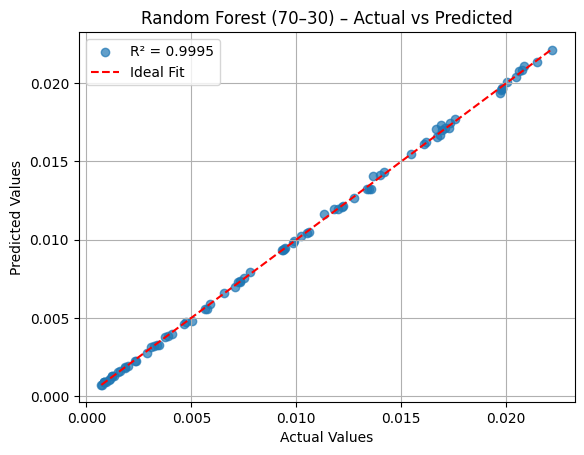

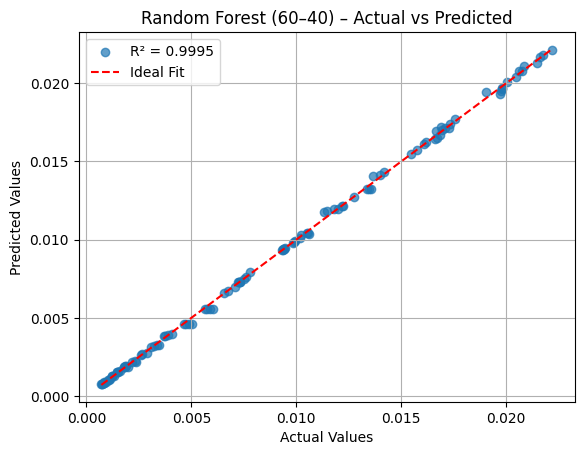

In [40]:
plot_actual_vs_predicted(
    y_test_true_20,
    y_test_pred_20_rf,
    "Random Forest (80–20) – Actual vs Predicted"
)

plot_actual_vs_predicted(
    y_test_true_30,
    y_test_pred_30_rf,
    "Random Forest (70–30) – Actual vs Predicted"
)

plot_actual_vs_predicted(
    y_test_true_40,
    y_test_pred_40_rf,
    "Random Forest (60–40) – Actual vs Predicted"
)


In [41]:
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_80.feature_importances_
})

print(feature_importance_rf.sort_values(by="Importance", ascending=False))


                  Feature  Importance
0        X1_Temperature_C    0.535694
2  X3_BaseFluid_viscosity    0.457275
1        X2_Concentration    0.007031


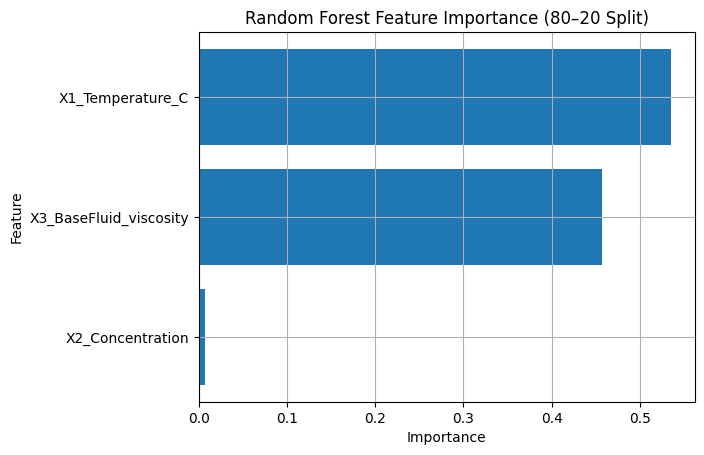

In [43]:
import matplotlib.pyplot as plt

# Sort for plotting
feature_importance_rf_sorted = feature_importance_rf.sort_values(
    by="Importance", ascending=False
)

plt.figure()
plt.barh(
    feature_importance_rf_sorted["Feature"],
    feature_importance_rf_sorted["Importance"]
)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance (80–20 Split)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


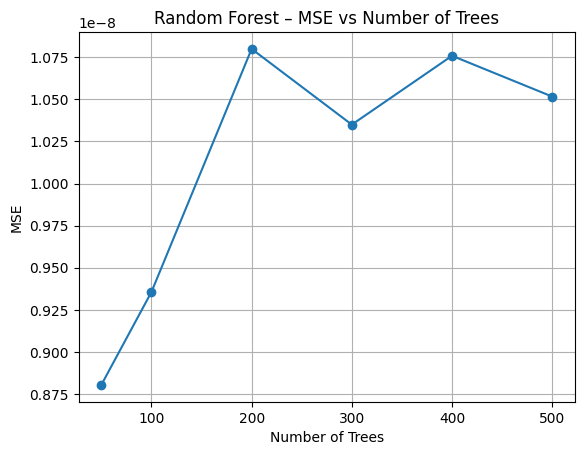

In [42]:

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def plot_mse_vs_trees_rf(X_train, y_train, X_test, y_test, y_scaler, title):

    tree_counts = [50, 100, 200, 300, 400, 500]
    mse_values = []

    # Convert test target once
    y_test_true = y_scaler.inverse_transform(
        y_test.reshape(-1, 1)
    ).ravel()

    for n_trees in tree_counts:
        rf = RandomForestRegressor(
            n_estimators=n_trees,
            random_state=42,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)

        y_pred = y_scaler.inverse_transform(
            rf.predict(X_test).reshape(-1, 1)
        ).ravel()

        mse = mean_squared_error(y_test_true, y_pred)
        mse_values.append(mse)

    plt.figure()
    plt.plot(tree_counts, mse_values, marker='o')
    plt.xlabel("Number of Trees")
    plt.ylabel("MSE")
    plt.title(title)
    plt.grid(True)
    plt.show()
plot_mse_vs_trees_rf(
    X_train_80, y_train_80,
    X_test_20, y_test_20,
    y_scaler,
    "Random Forest – MSE vs Number of Trees"
)


XG BOOST


In [44]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import XGBoost regressor
from xgboost import XGBRegressor

# STEP 1: Import utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# STEP 2: Define evaluation metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)     # Mean Squared Error
    rmse = np.sqrt(mse)                          # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)    # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)                # R-squared
    return mse, rmse, mae, r2


In [45]:
xgb_80 = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)
xgb_80.fit(X_train_80, y_train_80)

xgb_70 = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)
xgb_70.fit(X_train_70, y_train_70)

xgb_60 = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)
xgb_60.fit(X_train_60, y_train_60)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [46]:
y_test_pred_20_xgb = y_scaler.inverse_transform(
    xgb_80.predict(X_test_20).reshape(-1,1)
).ravel()

y_test_true_20 = y_scaler.inverse_transform(
    y_test_20.reshape(-1,1)
).ravel()

y_test_pred_30_xgb = y_scaler.inverse_transform(
    xgb_70.predict(X_test_30).reshape(-1,1)
).ravel()

y_test_true_30 = y_scaler.inverse_transform(
    y_test_30.reshape(-1,1)
).ravel()

y_test_pred_40_xgb = y_scaler.inverse_transform(
    xgb_60.predict(X_test_40).reshape(-1,1)
).ravel()

y_test_true_40 = y_scaler.inverse_transform(
    y_test_40.reshape(-1,1)
).ravel()


In [47]:
print("========== XGBOOST RESULTS (3 FEATURES) ==========")

print("\n80–20 SPLIT (TEST)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_20, y_test_pred_20_xgb))

print("\n70–30 SPLIT (TEST)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_30, y_test_pred_30_xgb))

print("\n60–40 SPLIT (TEST)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true_40, y_test_pred_40_xgb))


========== XGBOOST RESULTS (3 FEATURES) ==========

80–20 SPLIT (TEST)
MSE, RMSE, MAE, R2 = (1.4558291843459539e-08, np.float64(0.00012065774671963478), 5.196766859878254e-05, 0.99970264791683)

70–30 SPLIT (TEST)
MSE, RMSE, MAE, R2 = (1.1792692141048199e-08, np.float64(0.00010859416255512172), 5.944990505517293e-05, 0.9997394533882554)

60–40 SPLIT (TEST)
MSE, RMSE, MAE, R2 = (1.3910189146067906e-08, np.float64(0.00011794146491403227), 6.0431206145296164e-05, 0.9996863652405817)


In [48]:
def plot_actual_vs_predicted(y_true, y_pred, title):
    r2 = r2_score(y_true, y_pred)

    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.7, label=f"R² = {r2:.4f}")
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()], 'r--', label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


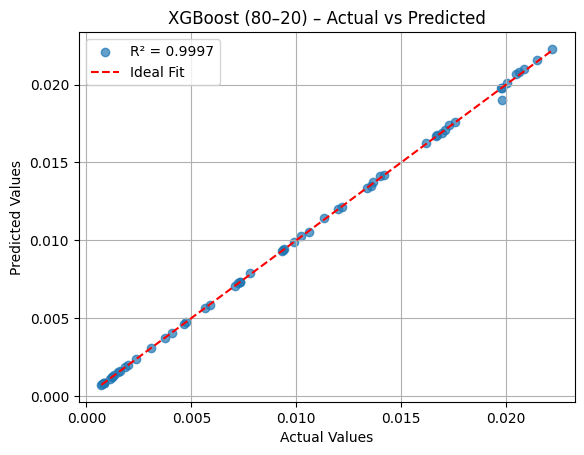

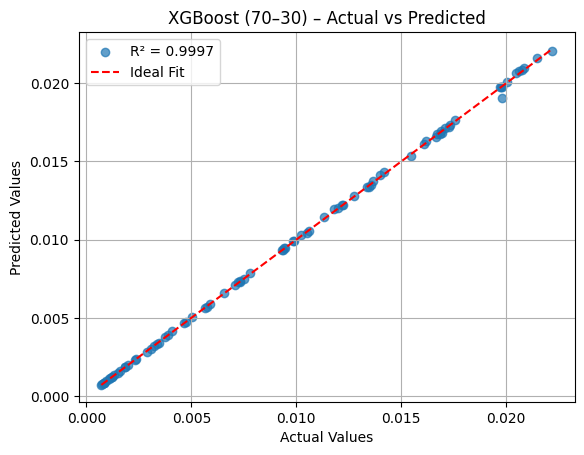

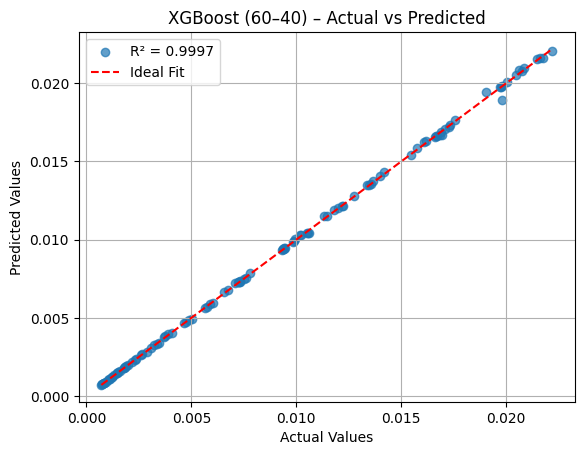

In [49]:
plot_actual_vs_predicted(
    y_test_true_20,
    y_test_pred_20_xgb,
    "XGBoost (80–20) – Actual vs Predicted"
)

plot_actual_vs_predicted(
    y_test_true_30,
    y_test_pred_30_xgb,
    "XGBoost (70–30) – Actual vs Predicted"
)

plot_actual_vs_predicted(
    y_test_true_40,
    y_test_pred_40_xgb,
    "XGBoost (60–40) – Actual vs Predicted"
)


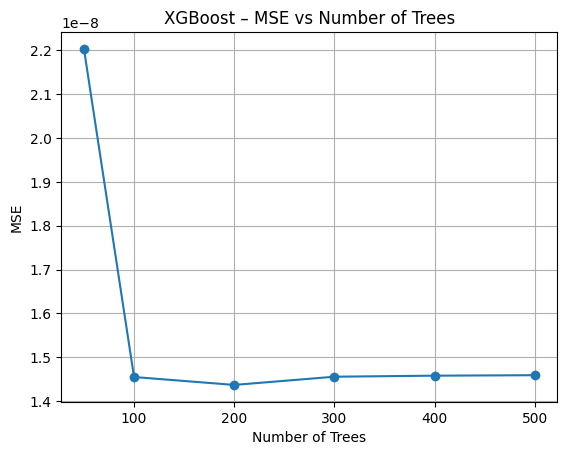

In [51]:
def plot_mse_vs_trees_xgb(X_train, y_train, X_test, y_test, y_scaler, title):

    tree_counts = [50, 100, 200, 300, 400, 500]
    mse_values = []

    y_test_true = y_scaler.inverse_transform(
        y_test.reshape(-1,1)
    ).ravel()

    for n_trees in tree_counts:
        model = XGBRegressor(
            n_estimators=n_trees,
            max_depth=5,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            objective='reg:squarederror',
            random_state=42
        )
        model.fit(X_train, y_train)

        y_pred = y_scaler.inverse_transform(
            model.predict(X_test).reshape(-1,1)
        ).ravel()

        mse_values.append(mean_squared_error(y_test_true, y_pred))

    plt.figure()
    plt.plot(tree_counts, mse_values, marker='o')
    plt.xlabel("Number of Trees")
    plt.ylabel("MSE")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_mse_vs_trees_xgb(
    X_train_80, y_train_80,
    X_test_20, y_test_20,
    y_scaler,
    "XGBoost – MSE vs Number of Trees"
)


In [52]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def plot_xgb_mse_vs_estimators_all_splits(
    splits_data, y_scaler, title
):
    """
    splits_data: list of tuples
    (label, X_train, y_train, X_test, y_test)
    """

    tree_counts = [50, 100, 200, 300, 400, 500]

    plt.figure()

    for label, X_train, y_train, X_test, y_test in splits_data:

        mse_values = []

        y_test_true = y_scaler.inverse_transform(
            y_test.reshape(-1, 1)
        ).ravel()

        for n_trees in tree_counts:
            model = XGBRegressor(
                n_estimators=n_trees,
                max_depth=5,
                learning_rate=0.1,
                subsample=0.8,
                colsample_bytree=0.8,
                objective='reg:squarederror',
                random_state=42
            )
            model.fit(X_train, y_train)

            y_pred = y_scaler.inverse_transform(
                model.predict(X_test).reshape(-1, 1)
            ).ravel()

            mse_values.append(mean_squared_error(y_test_true, y_pred))

        plt.plot(tree_counts, mse_values, marker='o', label=label)

    plt.xlabel("Number of Estimators (Trees)")
    plt.ylabel("MSE")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


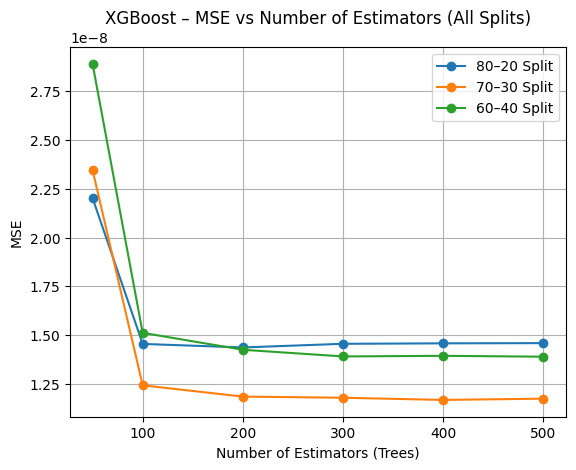

In [53]:
plot_xgb_mse_vs_estimators_all_splits(
    splits_data=[
        ("80–20 Split", X_train_80, y_train_80, X_test_20, y_test_20),
        ("70–30 Split", X_train_70, y_train_70, X_test_30, y_test_30),
        ("60–40 Split", X_train_60, y_train_60, X_test_40, y_test_40),
    ],
    y_scaler=y_scaler,
    title="XGBoost – MSE vs Number of Estimators (All Splits)"
)
